In [1]:
#importing libraries
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,9

In [3]:
def ackley(x):
  #returns the point value of the given coordinate
    arg1 = -0.2*np.sqrt(0.5*(x[0]**2 + x[1]**2))
    arg2 = 0.5*(np.cos(2*np.pi*x[0]) + np.cos(2*np.pi*x[1]))
    return -20 * np.exp(arg1) - np.exp(arg2) + 20 + np.e

In [4]:
ackley((0,0))

4.440892098500626e-16

In [5]:
bounds = [(-5,5), (-5, 5)]

In [6]:
from scipy.optimize import differential_evolution

In [7]:
res = differential_evolution (ackley, bounds, seed = 42, strategy='best1bin', popsize=150)

In [8]:
res

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 30063
     nit: 99
 success: True
       x: array([0., 0.])

In [9]:
# Посмотрим как стратегии меняют результат. Допущение: там, где функция не была выполнена успешно, будем ставить 0.
stra = ['best1bin','best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 
         'rand2exp', 'randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
def res_creation_stra():
    nfev = []
    for i in stra:
        res = differential_evolution (ackley, bounds, seed = 42, strategy=i)
        if res.success == True:
            nfev.append(res.nfev)
        else:
            nfev.append(0)
    return nfev

In [10]:
y_vals_stra = res_creation_stra()

In [11]:
y_vals_stra

[2973, 4383, 7623, 5013, 0, 7563, 10473, 3123, 0, 4953, 7743, 4773]

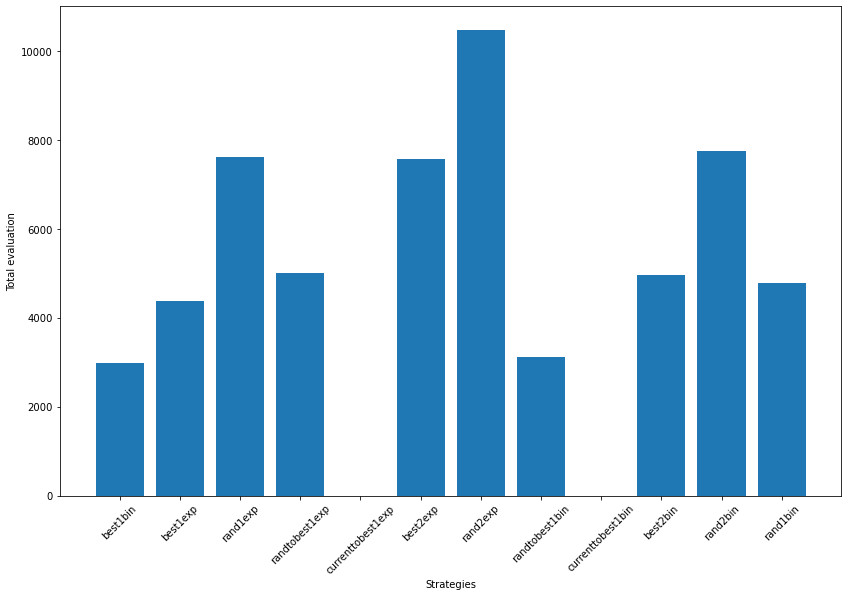

In [12]:
plt.bar(stra,y_vals_stra)
plt.xlabel('Strategies')
plt.ylabel('Total evaluation')
plt.xticks(rotation = 45)
plt.show()
# лучшая стратегия при прочих равных это best1bin

In [13]:
# Посмотрим как popsize меняeт результат. Допущение: там, где функция не была выполнена успешно, будем ставить 0.
pop = list(np.random.randint(1, 150, 15))
def res_creation_pop():
    nfev = []
    for i in pop:
        res = differential_evolution (ackley, bounds, seed = 42, popsize=i)
        if res.success == True:
            nfev.append(res.nfev)
        else:
            nfev.append(0)
    return nfev

In [15]:
y_vals_pops = res_creation_pop()

In [23]:
print(y_vals_pops)
print(pop)

[2975, 23243, 16919, 3225, 11193, 27195, 4671, 2123, 24315, 6271, 24815, 20663, 20709, 4419, 22503]
[14, 122, 86, 17, 53, 133, 24, 10, 129, 32, 119, 103, 111, 22, 110]


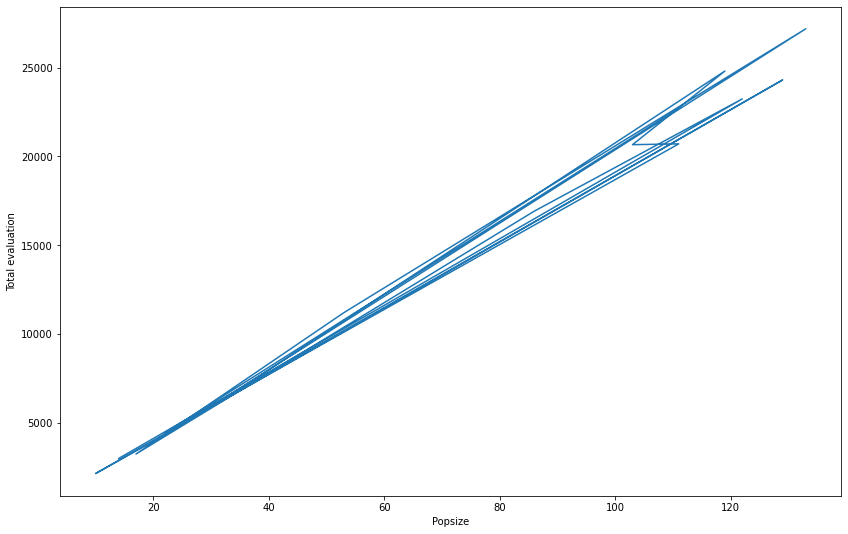

In [24]:
plt.plot(list(pop),y_vals_pops)
plt.xlabel('Popsize')
plt.ylabel('Total evaluation')
plt.show()
# 